In [1]:
import pandas as pd 
import numpy as np 
import  os

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [5]:
data.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1600 non-null   float64
 1   feature_2  1600 non-null   float64
 2   feature_3  1600 non-null   float64
 3   feature_4  1600 non-null   float64
 4   feature_5  1600 non-null   float64
 5   target     1600 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


This is trail in VS code 

In [8]:
def cost(theta,x,y):
    m = len(y)
    n = len(theta)
    y = y.reshape(m,1)
    theta = theta.reshape(n,1)
    J = np.sum( (x.dot(theta)-y)**2 )/(2*m)
    return J

In [9]:
def grad(theta,x,y):
    m = len(y)
    n = len(theta)
    y = y.reshape(m,1)
    theta = theta.reshape(n,1)
    grad = x.T.dot( x.dot(theta) - y )/(m)
    return grad
    

<AxesSubplot:xlabel='feature_1', ylabel='Count'>

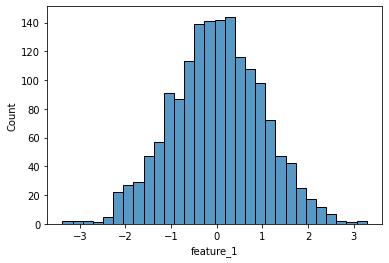

In [12]:
import seaborn as sns
sns.histplot(data['feature_1'])

<AxesSubplot:xlabel='feature_2', ylabel='Count'>

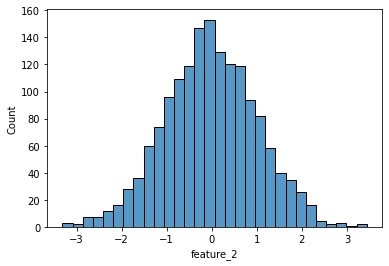

In [13]:
sns.histplot(data['feature_2'])

<AxesSubplot:xlabel='feature_3', ylabel='Count'>

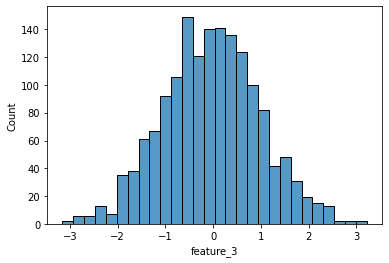

In [14]:
sns.histplot(data['feature_3'])

<AxesSubplot:xlabel='feature_4', ylabel='Count'>

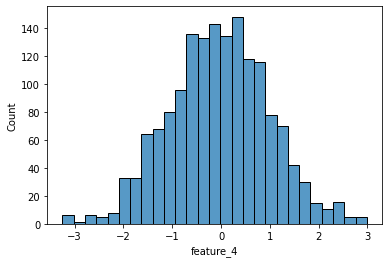

In [15]:
sns.histplot(data['feature_4'])

<AxesSubplot:xlabel='feature_5', ylabel='Count'>

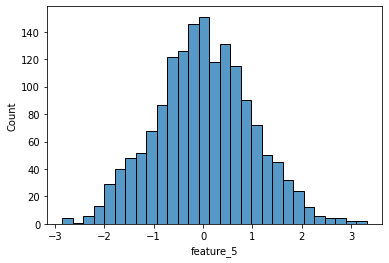

In [16]:
sns.histplot(data['feature_5'])

<AxesSubplot:xlabel='target', ylabel='Count'>

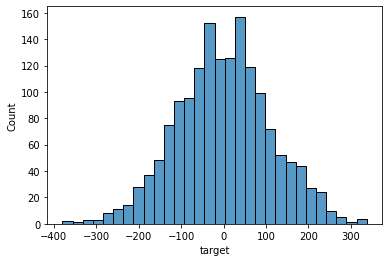

In [17]:
sns.histplot(data['target'])

In [19]:
y = data['target'].to_numpy()
data.drop('target',axis = 1, inplace =  True)
x = data.to_numpy()

In [35]:
mu = np.mean(y)
sd = np.std(y)

y = (y-mu)/sd

In [23]:
x = np.concatenate([ np.ones((x.shape[0],1)), x ],axis = 1)

In [24]:
import scipy.optimize as op

In [25]:
theta = np.random.rand(x.shape[1],1)

In [36]:
result = op.fmin_tnc(cost,x0 = theta ,args=(x,y),fprime=grad)
finaltheta = result[0].reshape((-1,1))

In [37]:
finaltheta

array([[0.04220002],
       [0.26811047],
       [0.83700527],
       [0.07479746],
       [0.40438213],
       [0.02275526]])

In [38]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [43]:
yp = x.dot(finaltheta)

In [44]:
y

array([-0.74497131, -0.44456826,  0.69509218, ..., -0.97400699,
       -0.4305095 , -1.05014038])

In [45]:
MSE(yp,y)

0.0339060330179778

In [46]:
r2_score(yp,y)

0.9649039154016974